In [1]:
# Import necessary libraries
import kagglehub
import os
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Download latest version of the dataset
path = kagglehub.dataset_download("mantri7/imdb-movie-reviews-dataset")
# Load dataset using the downloaded path
df = pd.read_csv(os.path.join(path, "train_data (1).csv"))
# Assign meaningful column names
df.columns = ['review', 'label']

100%|██████████| 25.7M/25.7M [00:00<00:00, 88.2MB/s]

Extracting files...


In [3]:
# Increase column width to 500 characters to display longer portions of each review
pd.set_option('display.max_colwidth', 500)
# Preview the first 5 rows of the dataset
df.head()

,review,label
0,"This film is absolutely awful, but nevertheless, it can be hilarious at times, although this humor is entirely unintentional.<br /><br />The plot was beyond ridiculous. I don't even think a 2 year-old would be convinced by the ludicrous idiocy that the film-makers tried to slap together into a story. However, on the positive side, some of the horrifically inane plot twists provide a great deal of humor. For example, ""Wow, Lady Hogbottom has a giant missile hidden in her back yard!"" It gets w...",0
1,"Well since seeing part's 1 through 3 I can honestly say that they should have NEVER made part 4. Everything from the tacky, and I DO mean tacky score to the really bad acting, I dare anyone to watch this and not be bored out of their minds.<br /><br />I mean parts 1 to 3 kept the vibe strong on the plot of Damion, but without him around in this one it's just not the same. Sure by the end of part 3 I was getting a little tired of the continued story line's, but it was a good closure at the en...",0
2,"I got to see this film at a preview and was dazzled by it. It's not the typical romantic comedy. I can't remember laughing so hard at a film and yet being moved by it. The laughs aren't gags here--they're observations, laughs of recognition, little shocks of ""Oh, my God, I thought I was the only one who felt that way!"" I won't give away the plot, which is more than just ""Guy falls in love with his brother's girlfriend."" The whole family plays a part in the relationship here. Probably the bes...",1
3,"This adaptation positively butchers a classic which is beloved for its subtlety. Timothy Dalton has absolutely no conception of the different nuances of Rochester's character. I get the feeling he never even read the book, just sauntered on set in his too tight breeches and was handed a character summary that read ""Grumpy, broody, murky past."" He plays Rochester not as a character or as a real person but as an over the top grouch who never cracks a smile until after he gets engaged at which ...",0
4,"Råzone is an awful movie! It is so simple. It seems they tried to make a movie to show the reel life. Just like Zappa did many years ago. But unfortunately Denmark lacks good young actors. Leon are by many still the little girl in ""krummernes Jul"", and Laura is simply not good enough to play such an important role. several times in the movie she plays with out soul and this is destroying the movie!<br /><br />Even though i consider it a movie you ought to see. I do not agree that the youth a...",0


In [4]:
# Check for empty rows
df.isnull().sum()

,0
review,0
label,0


In [5]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'\d+', '', text)    # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Lowercase
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply cleaning
df['cleaned_review'] = df['review'].apply(clean_text)

In [6]:
# Preview the first 5 rows of the cleaned dataset
df.head()

,review,label,cleaned_review
0,"This film is absolutely awful, but nevertheless, it can be hilarious at times, although this humor is entirely unintentional.<br /><br />The plot was beyond ridiculous. I don't even think a 2 year-old would be convinced by the ludicrous idiocy that the film-makers tried to slap together into a story. However, on the positive side, some of the horrifically inane plot twists provide a great deal of humor. For example, ""Wow, Lady Hogbottom has a giant missile hidden in her back yard!"" It gets w...",0,film absolutely awful nevertheless hilarious times although humor entirely unintentionalthe plot beyond ridiculous dont even think yearold would convinced ludicrous idiocy filmmakers tried slap together story however positive side horrifically inane plot twists provide great deal humor example wow lady hogbottom giant missile hidden back yard gets worse even funnier ill spare youthe acting generally laughable kids roles sort cute believable hand annie pretty awful allaround adults dont take ...
1,"Well since seeing part's 1 through 3 I can honestly say that they should have NEVER made part 4. Everything from the tacky, and I DO mean tacky score to the really bad acting, I dare anyone to watch this and not be bored out of their minds.<br /><br />I mean parts 1 to 3 kept the vibe strong on the plot of Damion, but without him around in this one it's just not the same. Sure by the end of part 3 I was getting a little tired of the continued story line's, but it was a good closure at the en...",0,well since seeing parts honestly say never made part everything tacky mean tacky score really bad acting dare anyone watch bored mindsi mean parts kept vibe strong plot damion without around one sure end part getting little tired continued story lines good closure end third one reason part even could done much better job sht sit lol goes hour half life ill never see
2,"I got to see this film at a preview and was dazzled by it. It's not the typical romantic comedy. I can't remember laughing so hard at a film and yet being moved by it. The laughs aren't gags here--they're observations, laughs of recognition, little shocks of ""Oh, my God, I thought I was the only one who felt that way!"" I won't give away the plot, which is more than just ""Guy falls in love with his brother's girlfriend."" The whole family plays a part in the relationship here. Probably the bes...",1,got see film preview dazzled typical romantic comedy cant remember laughing hard film yet moved laughs arent gags heretheyre observations laughs recognition little shocks oh god thought one felt way wont give away plot guy falls love brothers girlfriend whole family plays part relationship probably best blend laughter warmth since sleeping steve carell goes much deeper hes gone first time really liked cast amazing list veteran theater actors ive loved roles blend make convincing family diann...
3,"This adaptation positively butchers a classic which is beloved for its subtlety. Timothy Dalton has absolutely no conception of the different nuances of Rochester's character. I get the feeling he never even read the book, just sauntered on set in his too tight breeches and was handed a character summary that read ""Grumpy, broody, murky past."" He plays Rochester not as a character or as a real person but as an over the top grouch who never cracks a smile until after he gets engaged at which ...",0,adaptation positively butchers classic beloved subtlety timothy dalton absolutely conception different nuances rochesters character get feeling never even read book sauntered set tight breeches handed character summary read grumpy broody murky past plays rochester character real person top grouch never cracks smile gets engaged point miraculously morphs pansy chemistry feeling adaptation excited incredulity also sympathy charlotte bronte definitely turning grave go reread book rochester pers...
4,"Råzone is an awful movie! It is so simple. It seems they tried to m

In [7]:
# Train-test split
x = df['cleaned_review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [8]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features = 5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [10]:
# Evaluation
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2500
           1       0.88      0.89      0.88      2500

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



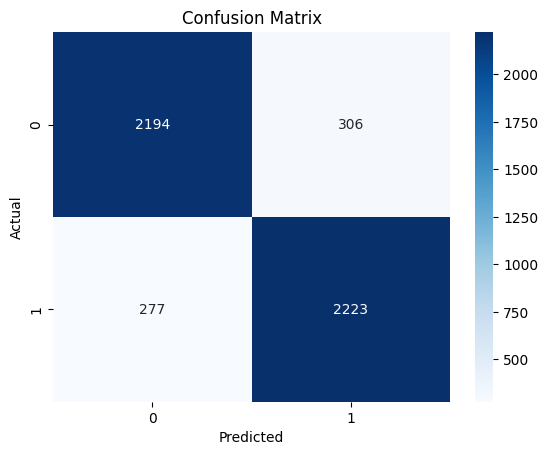

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# Save model and vectorizer
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump((model, vectorizer), f)

In [13]:
# Demo Script
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    return "Positive" if pred == 1 else "Negative"

# Example
print(predict_sentiment("The plot was boring and the acting was terrible."))

Negative


In [14]:
# Deep Learning model
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

# Convert sparse TF-IDF matrices to dense arrays
X_train_dense = X_train_vec.toarray()
X_test_dense = X_test_vec.toarray()

# Define early stopping callback
early_stop = EarlyStopping(
    monitor = 'val_loss',     # Watch validation loss
    patience = 2,             # Stop after 2 epochs with no improvement
    restore_best_weights = True
)

# Build model
dl_model = Sequential()
dl_model.add(Input(shape = (X_train_dense.shape[1],)))
dl_model.add(Dense(64, activation = 'relu'))
dl_model.add(Dropout(0.3))  # Drop 30% of neurons during training
dl_model.add(Dense(1, activation ='sigmoid'))

# Compile and train
dl_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
dl_model.fit(
    X_train_dense, y_train,
    epochs = 10,
    batch_size = 32,
    validation_data = (X_test_dense, y_test),
    callbacks = [early_stop]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7984 - loss: 0.5123 - val_accuracy: 0.8840 - val_loss: 0.2811
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9140 - loss: 0.2274 - val_accuracy: 0.8804 - val_loss: 0.2841
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9316 - loss: 0.1842 - val_accuracy: 0.8738 - val_loss: 0.3001


In [15]:
# Predict probabilities
y_pred_probs = dl_model.predict(X_test_dense)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype("int32")

# Print classification report for DL model
print(classification_report(y_test, y_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2500
           1       0.88      0.89      0.88      2500

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

